# Analyze classes

## Initial setup

### Load modules

In [1]:
# modules in this package
import load_and_preprocess as lp
import analysis as at
import bic_and_aic as ba
import plot_tools as pt
import file_io as io
import numpy as np
import xarray as xr
import density
import gmm
# plotting tools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import cmocean
# os tools
import os.path

# suppress a particular warning
import warnings
warnings.filterwarnings('ignore', 'RuntimeWarning: All-NaN slice encountered')

### Set runtime parameters (file locations, etc.)

In [2]:
# set locations and names
descrip = 'WeddellOnly' # extra description for filename
data_location = '../../so-chic-data/' # input data location
classified_data_location = 'models/profiles_-65to80lon_-85to-30lat_20to1000depth_5K_allDomain_revised.nc'
ploc = 'plots/plots_WeddellClassOnly_top1000m_K0K_forAGU22_and_OSpaper/'
#ploc = 'tests/'
dloc = 'models/'

# if plot directory doesn't exist, create it
if not os.path.exists(ploc):
    os.makedirs(ploc)
    
# if tSNE directory doesn't exist, create it
if not os.path.exists(ploc+'/tSNE/'):
    os.makedirs(ploc+'/tSNE/')

# save the processed output as a NetCDF file?
saveOutput = False

# number of PCA components (roughly 95%)
n_pca = 6

# make decision about n_components_selected (iterative part of analysis)
n_components_selected = 5

#longitude and latitude range
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45
# depth range
zmin = 20.0
zmax = 1000.0
# density range
sig0range = (26.6, 28.0)

# temperature and salinity ranges for plotting
lon_range=(lon_min, lon_max)
lat_range=(lat_min, lat_max)
Trange=(-2.2, 6.0)
Srange=(33.5, 35.0)

# create filename for saving GMM and saving labelled profiles
pca_fname = dloc + 'pca_' + str(int(lon_min)) + 'to' + str(int(lon_max)) + 'lon_' + str(int(lat_min)) + 'to' + str(int(lat_max)) + 'lat_' + str(int(zmin)) + 'to' + str(int(zmax)) + 'depth_' + str(int(n_pca)) + descrip
gmm_fname = dloc + 'gmm_' + str(int(lon_min)) + 'to' + str(int(lon_max)) + 'lon_' + str(int(lat_min)) + 'to' + str(int(lat_max)) + 'lat_' + str(int(zmin)) + 'to' + str(int(zmax)) + 'depth_' + str(int(n_components_selected)) + 'K_' + descrip
fname = dloc + 'profiles_' + str(int(lon_min)) + 'to' + str(int(lon_max)) + 'lon_' + str(int(lat_min)) + 'to' + str(int(lat_max)) + 'lat_' + str(int(zmin)) + 'to' + str(int(zmax)) + 'depth_' + str(int(n_components_selected)) + 'K_' + descrip + '.nc'

# colormap
colormap = plt.get_cmap('Dark2', n_components_selected)
colormap_cividis = plt.get_cmap('cividis', 20)

### Load classified profile data

In [3]:
dfp = xr.open_dataset("weddell_classified_n05.nc")
# select the top pressure level for plotting purposes
df1D = dfp.isel(depth=0)

### Mixed layer depth 

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
37.13 / 76.70 / 103.68 / 136.28 / 288.47
class = 1
min / Q25 / Q50 / Q75 / max
108.94 / 165.17 / 188.02 / 212.91 / 416.75
class = 2
min / Q25 / Q50 / Q75 / max
38.89 / 104.26 / 145.29 / 190.43 / 490.35
class = 3
min / Q25 / Q50 / Q75 / max
44.36 / 126.51 / 146.17 / 168.42 / 349.35
class = 4
min / Q25 / Q50 / Q75 / max
26.06 / 81.91 / 112.34 / 140.47 / 259.41
plot_tools.plot_hist_map
file_io.load_bathymetry


/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


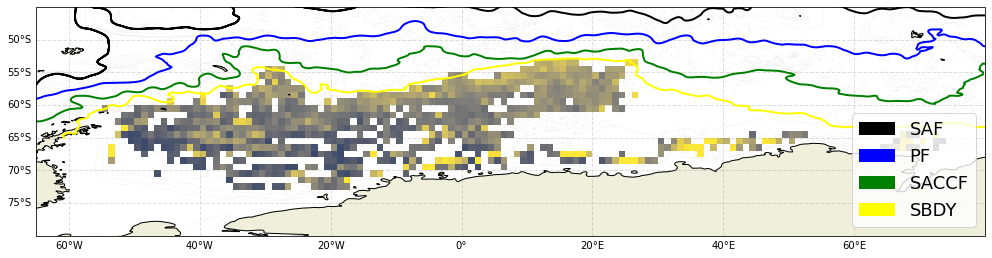

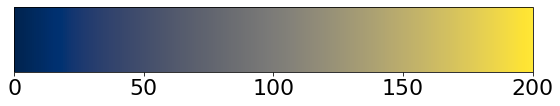

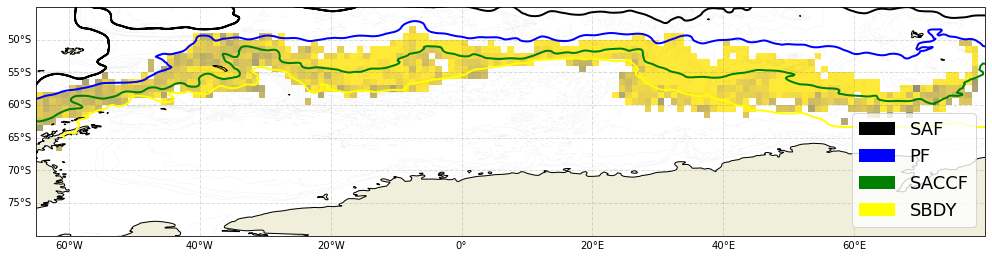

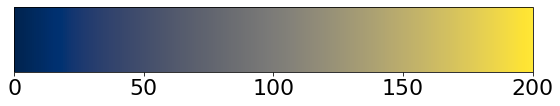

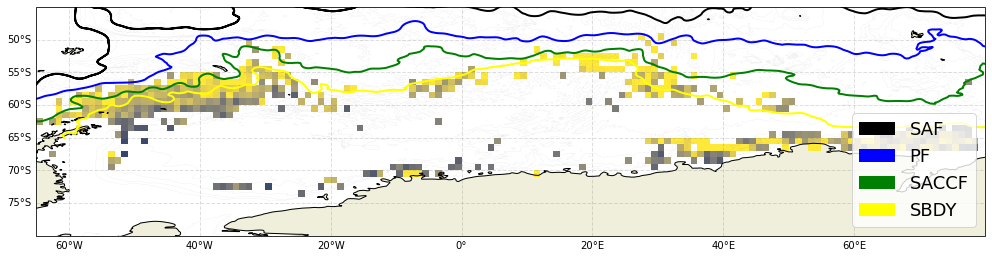

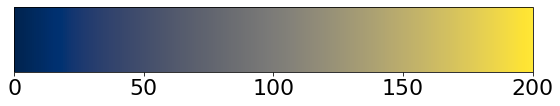

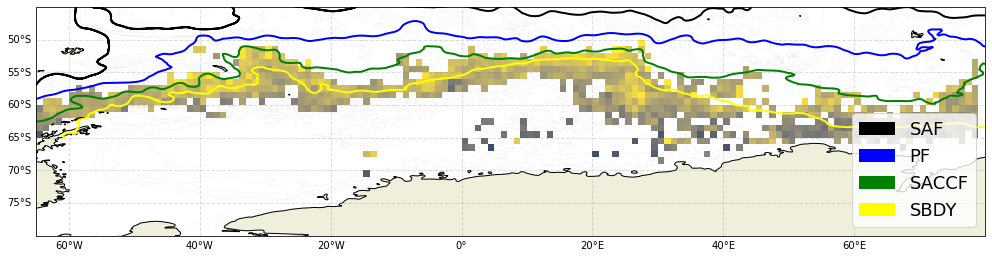

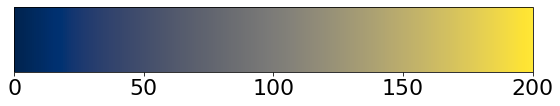

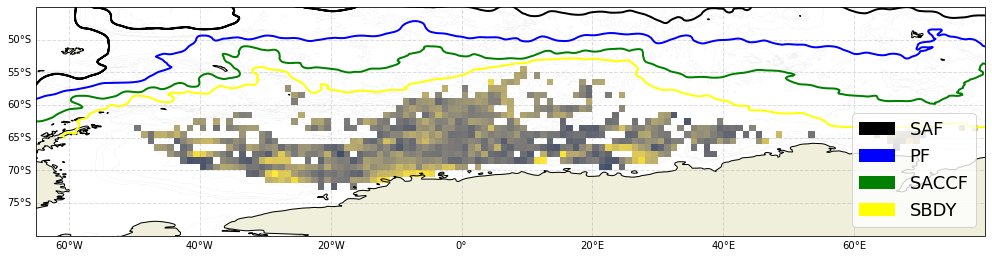

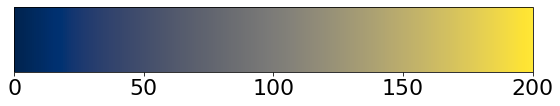

In [4]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected)

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,200),
                 vartype='mld',
                 colormap=plt.get_cmap('cividis'))

## Depth of temperature  minimum

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
20.00 / 40.00 / 80.00 / 100.00 / 1000.00
class = 1
min / Q25 / Q50 / Q75 / max
20.00 / 100.00 / 120.00 / 140.00 / 1000.00
class = 2
min / Q25 / Q50 / Q75 / max
20.00 / 40.00 / 80.00 / 120.00 / 1000.00
class = 3
min / Q25 / Q50 / Q75 / max
20.00 / 60.00 / 80.00 / 120.00 / 1000.00
class = 4
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 40.00 / 60.00 / 120.00
plot_tools.plot_hist_map
file_io.load_bathymetry


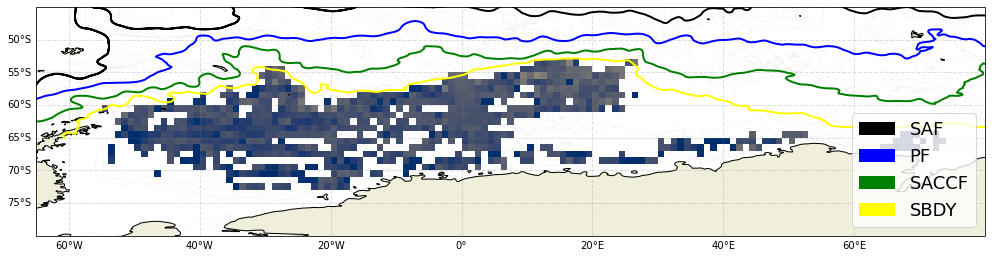

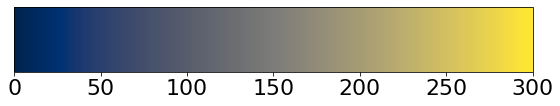

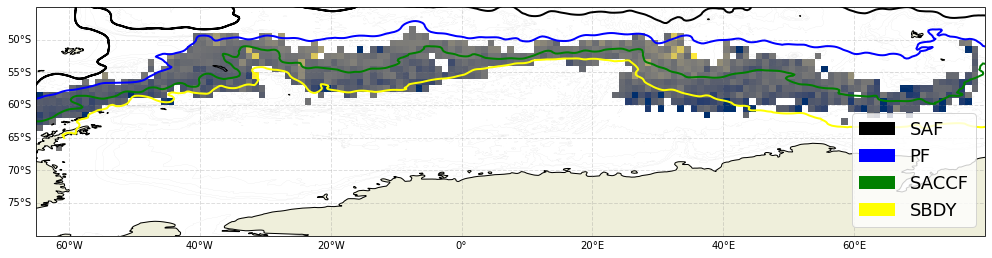

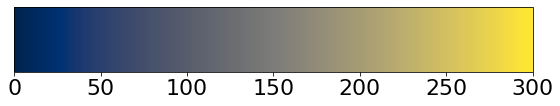

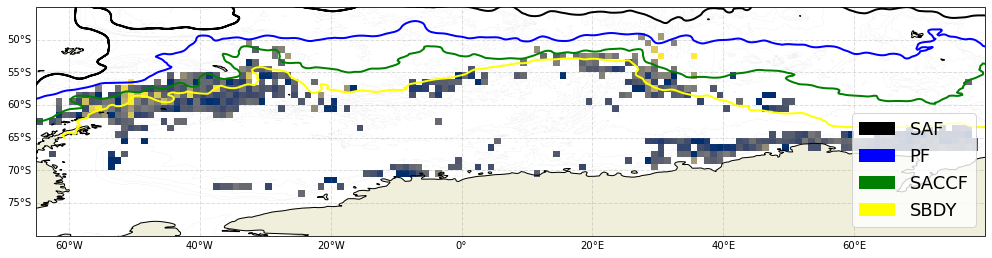

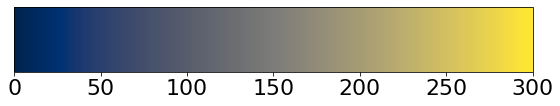

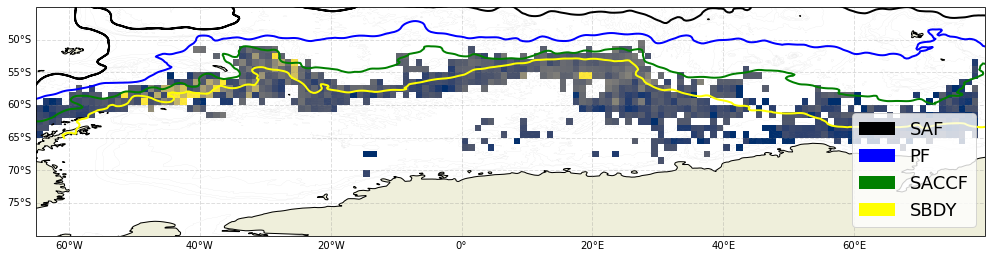

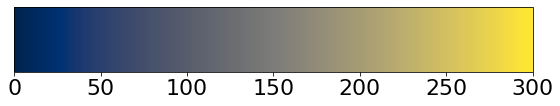

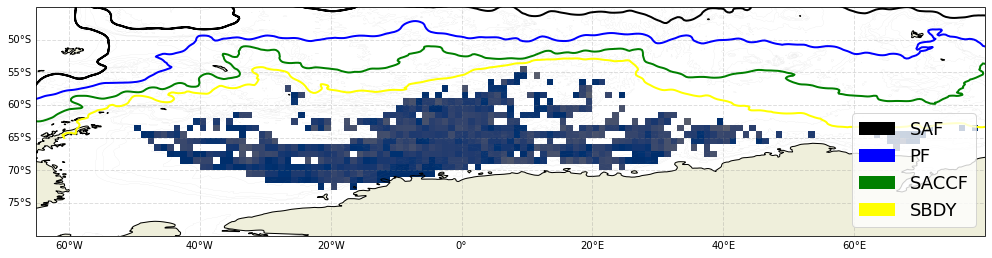

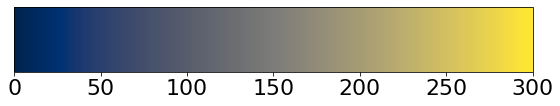

In [5]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, varname='Tmin_depth')

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,300),
                 vartype='Tmin_depth',
                 colormap=plt.get_cmap('cividis'))

### Depth of temperature maximum

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
20.00 / 260.00 / 320.00 / 440.00 / 820.00
class = 1
min / Q25 / Q50 / Q75 / max
20.00 / 40.00 / 380.00 / 440.00 / 910.00
class = 2
min / Q25 / Q50 / Q75 / max
20.00 / 320.00 / 500.00 / 640.00 / 1000.00
class = 3
min / Q25 / Q50 / Q75 / max
20.00 / 260.00 / 320.00 / 380.00 / 1000.00
class = 4
min / Q25 / Q50 / Q75 / max
20.00 / 180.00 / 200.00 / 260.00 / 560.00
plot_tools.plot_hist_map
file_io.load_bathymetry


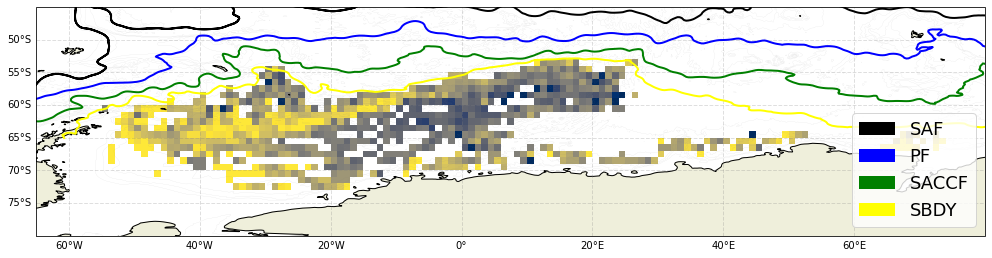

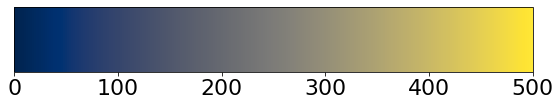

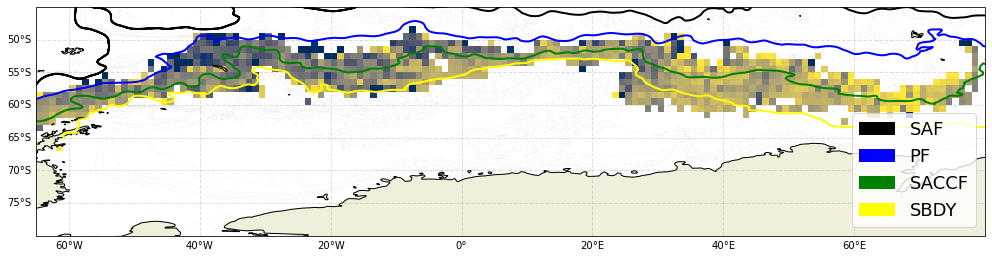

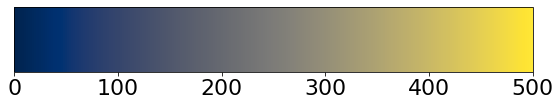

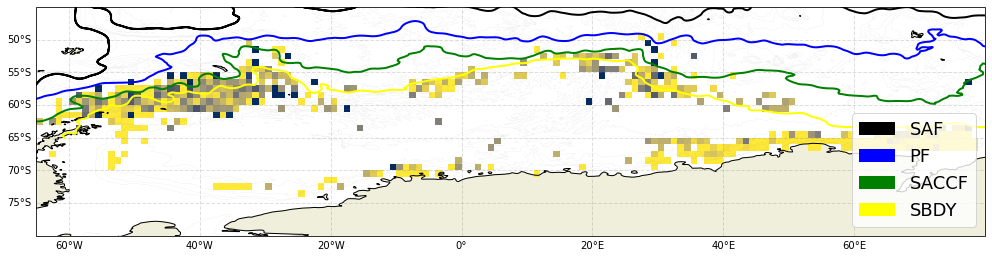

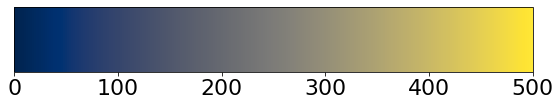

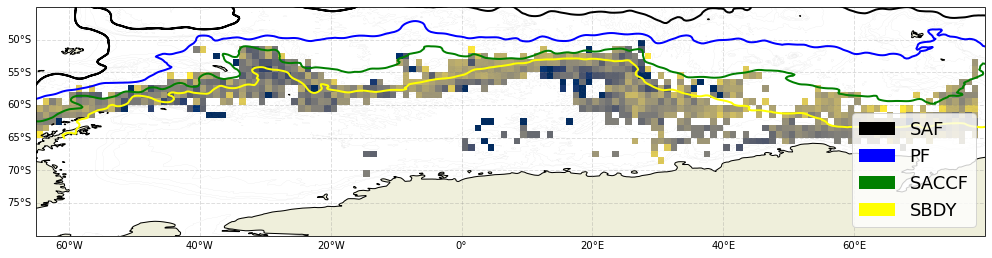

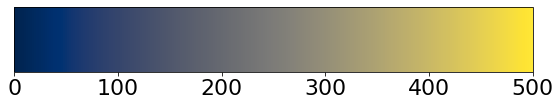

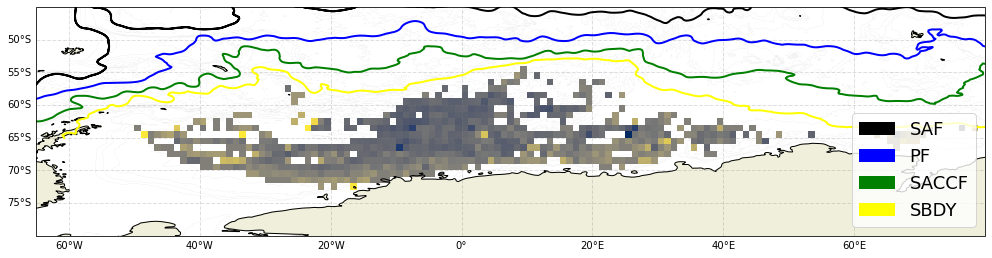

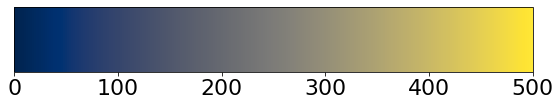

In [6]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, varname='Tmax_depth')

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,500),
                 vartype='Tmax_depth',
                 colormap=plt.get_cmap('cividis'))

### Depth of salinity max

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
120.00 / 440.00 / 560.00 / 640.00 / 1000.00
class = 1
min / Q25 / Q50 / Q75 / max
180.00 / 910.00 / 1000.00 / 1000.00 / 1000.00
class = 2
min / Q25 / Q50 / Q75 / max
380.00 / 730.00 / 910.00 / 1000.00 / 1000.00
class = 3
min / Q25 / Q50 / Q75 / max
200.00 / 640.00 / 820.00 / 910.00 / 1000.00
class = 4
min / Q25 / Q50 / Q75 / max
160.00 / 320.00 / 380.00 / 500.00 / 910.00
plot_tools.plot_hist_map
file_io.load_bathymetry


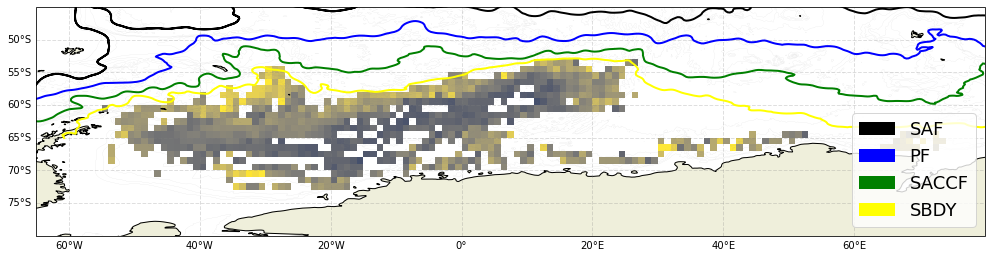

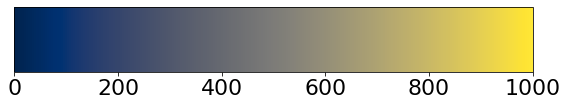

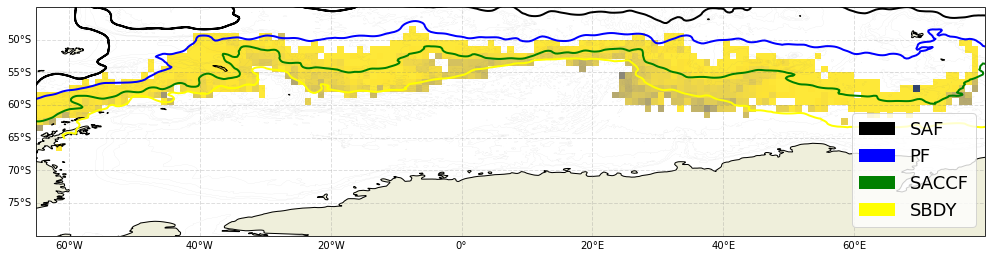

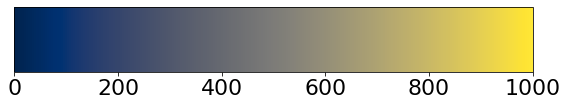

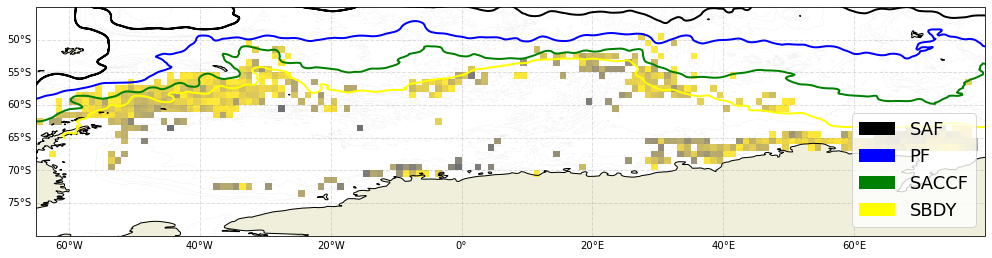

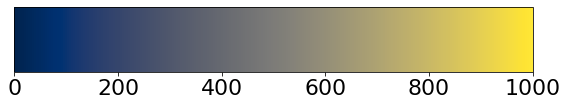

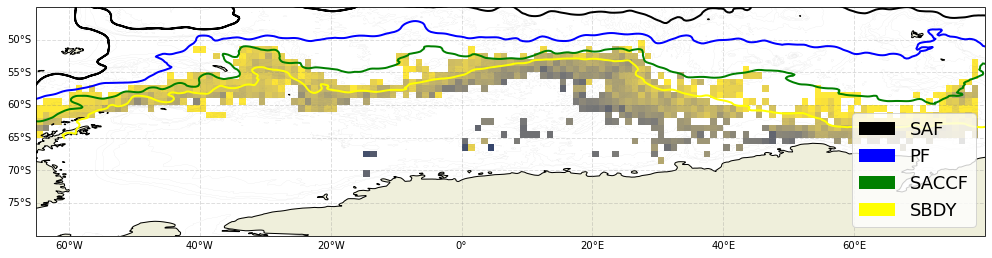

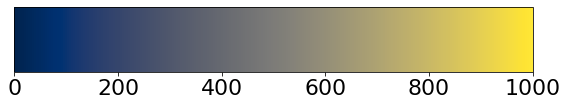

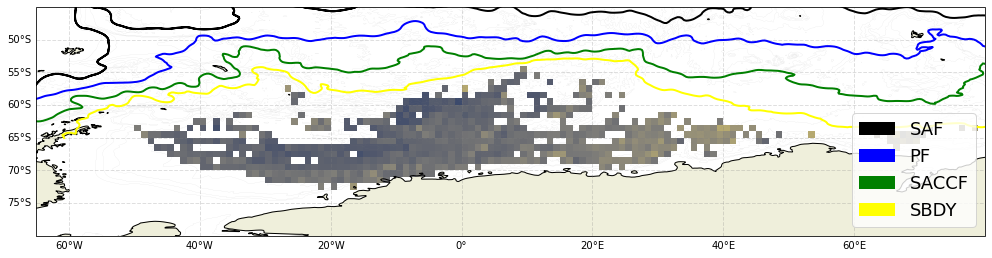

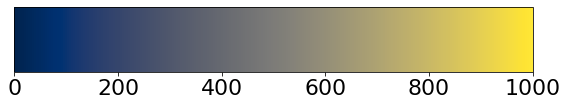

In [7]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, varname='Smax_depth')

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,1000),
                 vartype='Smax_depth',
                 colormap=plt.get_cmap('cividis'))

### Depth of salinity minimum

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 20.00 / 20.00 / 140.00
class = 1
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 20.00 / 40.00 / 180.00
class = 2
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 20.00 / 20.00 / 140.00
class = 3
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 20.00 / 20.00 / 120.00
class = 4
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 20.00 / 20.00 / 80.00
plot_tools.plot_hist_map
file_io.load_bathymetry


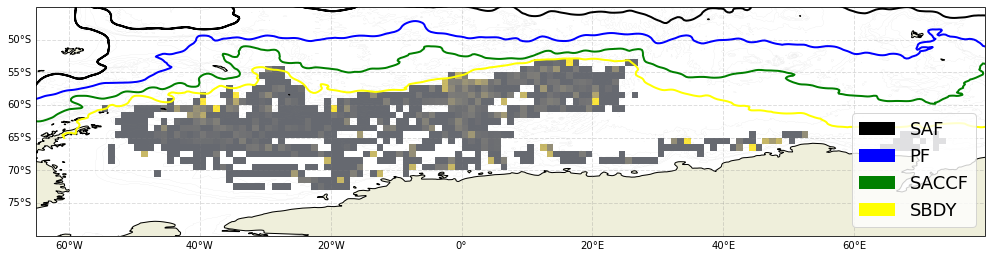

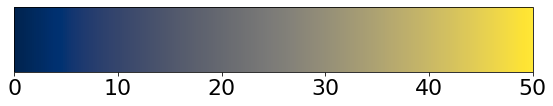

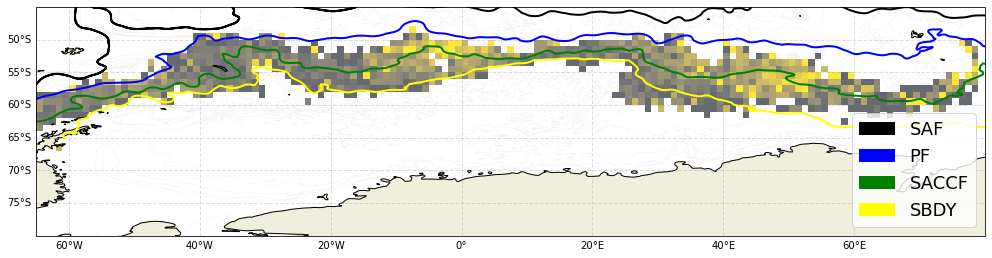

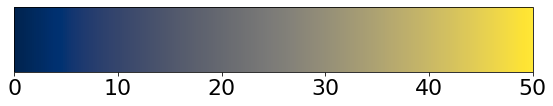

In [ ]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, varname='Smin_depth')

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,50),
                 vartype='Smin_depth',
                 colormap=plt.get_cmap('cividis'))

### Dynamic height

In [ ]:
# stats at 500mb
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp.isel(depth=14), n_components_selected, varname='dyn_height')

# plot maps of dynamic height  
pt.plot_dynamic_height_maps(ploc, dfp, lon_range, lat_range, n_components_selected)

### imetric

In [ ]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'imetric')

# histogram map (imetric)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,1),
                 vartype='imetric',
                 colormap=plt.get_cmap('cividis'))

### Volume histograms 

In [ ]:
# some T-S histograms
sbins = np.arange(Srange[0], Srange[1], 0.025)
tbins = np.arange(Trange[0], Trange[1], 0.1)
df_select = dfp.where(dfp.label==0, drop=True)
histTS_class1 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class1')
df_select = dfp.where(dfp.label==1, drop=True)
histTS_class2 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class2')
df_select = dfp.where(dfp.label==2, drop=True)
histTS_class3 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class3')
df_select = dfp.where(dfp.label==3, drop=True)
histTS_class4 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class4')

### Maximum temperature 

In [ ]:
# print stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'Tmax')

# histogram map (Tmax)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,3),
                 vartype='Tmax',
                 colormap=cmocean.cm.thermal)

### Minimum temperature

In [ ]:
# print stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'Tmin')

# histogram map (Tmax)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 c_range=(-2,2),
                 vartype='Tmin',
                 colormap=cmocean.cm.thermal)

### Minimum salinity

In [ ]:
# print stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'Smin')

# histogram map (Tmax)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 c_range=(33.0, 34.7),
                 vartype='Smin',
                 colormap=cmocean.cm.haline)

### T-S histogram by month

In [ ]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='month',
                colormap=cmocean.cm.phase)

## T-S histogram by year

In [ ]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='year',
                crange=[1975, 2020],
                colormap=cmocean.cm.thermal)

## T-S histogtram by MLD

In [ ]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='mld',
                crange=[0, 300],
                colormap=cmocean.cm.thermal)

## T-S histogram by imetric

In [ ]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='imetric',
                crange=[0, 1],
                colormap=cmocean.cm.thermal)

## Get mean label in each 1x1 bin

In [ ]:
pt.plot_hist_map(ploc, dfp,
                 lon_range, lat_range,
                 n_components_selected,
                 c_range=[0,4],
                 vartype='label',
                 colormap=colormap)